### Импорт библиотек
В этом проекте мы используем несколько библиотек, включая numpy, matplotlib и scikit-learn

In [2]:
# Импорт библиотек
import numpy as np # для работы с массивами данных (многомерными матрицами), математическими функциями
import matplotlib.pyplot as plt # для визуализации данных
import pandas as pd # для анализа и манипулирования табличными данными
import random # для генерации случайных чисел
import operator # для работы с функциями высшего порядка и сортировки

from sklearn.linear_model import LinearRegression # для построения моделей линейной регрессии
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score # для вычисления метрик среднеквадратичной ошибки (MSE), RMSE и коэффициента детерминации (R^2) 
from sklearn.preprocessing import PolynomialFeatures # для преобразования исходных признаков в полиномиальные, для построения моделей полиномиальной регрессии


### Создаем набор данных
Здесь мы создаем случайный набор данных.
Формула, которую мы используем: 
**y = random(from -3 to 20) + x - 4x^2 + 7x^3**


In [3]:
np.random.seed(0) # для повторяемости
x = np.random.normal(0, 1, 20) # генерируем x
y = np.random.normal(0, 1, 20) # генерируем y

### Построение набора данных
Мы используем точечную диаграмму для визуализации данных.

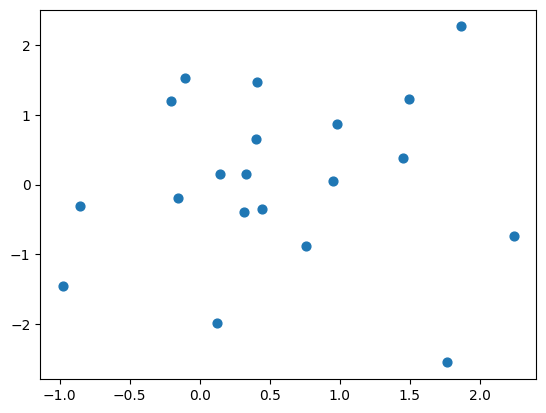

In [4]:
plt.scatter(x,y, s=40) # s - размер точки
plt.show()

In [5]:
# Преобразование данных из 1D-массива в 2D-массив
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [6]:
x

array([[ 1.76405235],
       [ 0.40015721],
       [ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [-0.97727788],
       [ 0.95008842],
       [-0.15135721],
       [-0.10321885],
       [ 0.4105985 ],
       [ 0.14404357],
       [ 1.45427351],
       [ 0.76103773],
       [ 0.12167502],
       [ 0.44386323],
       [ 0.33367433],
       [ 1.49407907],
       [-0.20515826],
       [ 0.3130677 ],
       [-0.85409574]])

In [7]:
y

array([[-2.55298982],
       [ 0.6536186 ],
       [ 0.8644362 ],
       [-0.74216502],
       [ 2.26975462],
       [-1.45436567],
       [ 0.04575852],
       [-0.18718385],
       [ 1.53277921],
       [ 1.46935877],
       [ 0.15494743],
       [ 0.37816252],
       [-0.88778575],
       [-1.98079647],
       [-0.34791215],
       [ 0.15634897],
       [ 1.23029068],
       [ 1.20237985],
       [-0.38732682],
       [-0.30230275]])

### Выполняем линейную регрессию
В этой ячейке мы выполняем линейную регрессию для нашего сгенерированного набора данных.

In [8]:
model_lin = LinearRegression()
model_lin.fit(x, y)
y_pred = model_lin.predict(x)

In [9]:
y_pred

array([[ 0.20161481],
       [ 0.03509529],
       [ 0.10573488],
       [ 0.25983285],
       [ 0.21425193],
       [-0.13307733],
       [ 0.10223702],
       [-0.03223973],
       [-0.02636246],
       [ 0.03637008],
       [ 0.00382609],
       [ 0.16379356],
       [ 0.07915561],
       [ 0.00109509],
       [ 0.04043141],
       [ 0.02697832],
       [ 0.16865346],
       [-0.03880836],
       [ 0.02446244],
       [-0.11803788]])

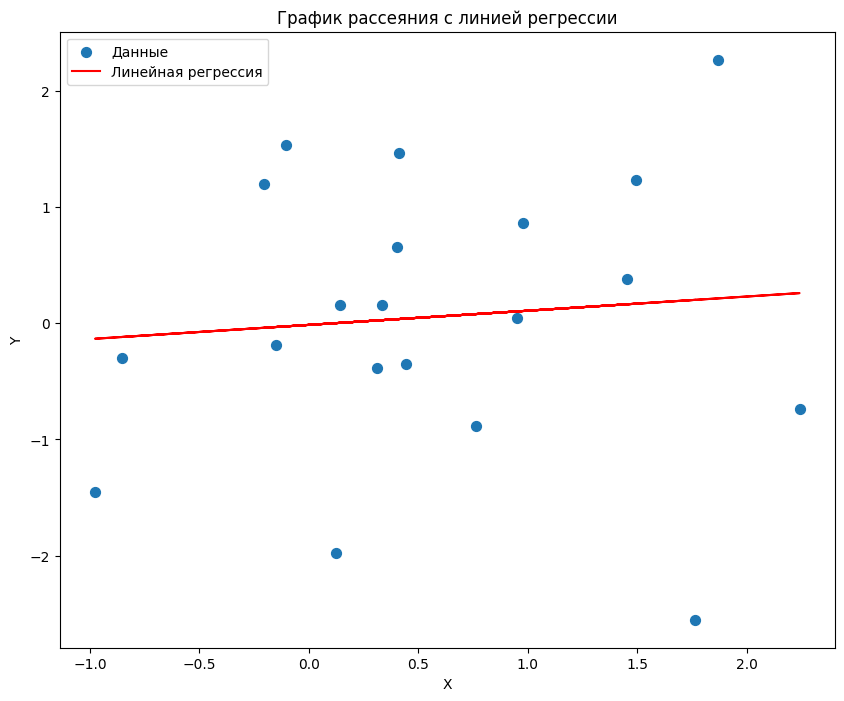

In [10]:
def plot_scatter_with_regression(x, y, y_pred, figsize=(8, 6), scatter_size=40):
  """
  Строит график рассеяния с линией регрессии.

  Args:
    x: Независимая переменная (массив NumPy или список).
    y: Зависимая переменная (массив NumPy или список).
    y_pred: Предсказанные значения (массив NumPy или список).
    figsize: Размер фигуры (ширина, высота) в дюймах.
    scatter_size: Размер точек на графике рассеяния.
  """
  plt.figure(figsize=figsize)  # Устанавливаем размер фигуры
  plt.scatter(x, y, s=scatter_size, label="Данные")  # Используем переданный размер точек
  plt.plot(x, y_pred, color='r', label="Линейная регрессия")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title("График рассеяния с линией регрессии")
  plt.legend()
  plt.show()


# Пример использования:
# Допустим, у вас есть данные x, y и предсказанные значения y_pred:
# x = ...
# y = ...
# y_pred = ...

# Строим график с размером 10x8 дюймов и размером точек 50
plot_scatter_with_regression(x, y, y_pred, figsize=(10, 8), scatter_size=50)

In [11]:
mse = mean_squared_error(y,y_pred)
rmse = root_mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)
print(f"MSE = {mse:.3f}")
print(f"RMSE = {rmse:.3f}")
print(f"R2 = {r2:.3f}")

MSE = 1.400
RMSE = 1.183
R2 = 0.008


Модель не имеет прогностической ценности, вариация зависимой переменной полностью обусловлена неучтенными факторами

### Выполнение полиномиальной регрессии
В этих ячейках мы создаем выполнение полиномиальной регрессии с помощью **scikit-learn**.

In [12]:
polynomial_features= PolynomialFeatures(degree=2) # полиномиальные признаки до второй степени (включительно)
x_poly = polynomial_features.fit_transform(x) # применили к данным

In [13]:
model = LinearRegression()
model.fit(x_poly, y) # обучаем на полиномиальных признаках
y_poly_pred = model.predict(x_poly)

### Ошибка вычисления
Здесь мы вычисляем значение mean_square_error, RMSE и показатель R^2.

Было для линейной 

MSE = 1.400

RMSE = 1.183

R2 = 0.008

In [14]:
mse = mean_squared_error(y,y_poly_pred)
rmse = root_mean_squared_error(y,y_poly_pred)
r2 = r2_score(y,y_poly_pred)
print(f"MSE = {mse:.3f}")
print(f"RMSE = {rmse:.3f}")
print(f"R2 = {r2:.3f}")

MSE = 1.324
RMSE = 1.151
R2 = 0.061


### Визуализация результатов
Сначала мы находим функцию, сгенерированную с помощью полиномиальной регрессии, а затем строим график результатов

In [15]:
print(model.coef_) # коэффициенты при x, веса
print(model.intercept_) # свободный коэффициент

[[ 0.          0.54780984 -0.32901375]]
[0.08832508]


In [16]:
res = f"y = f(x) = {str(model.intercept_[0]):.2f}"

for i,r in enumerate(model.coef_[0]):
    res = f"{res} + {r:.2f}*x^{i}"

print (res)

y = f(x) = 0.08832508210279366 + 0.00*x^0 + 0.55*x^1 + -0.33*x^2


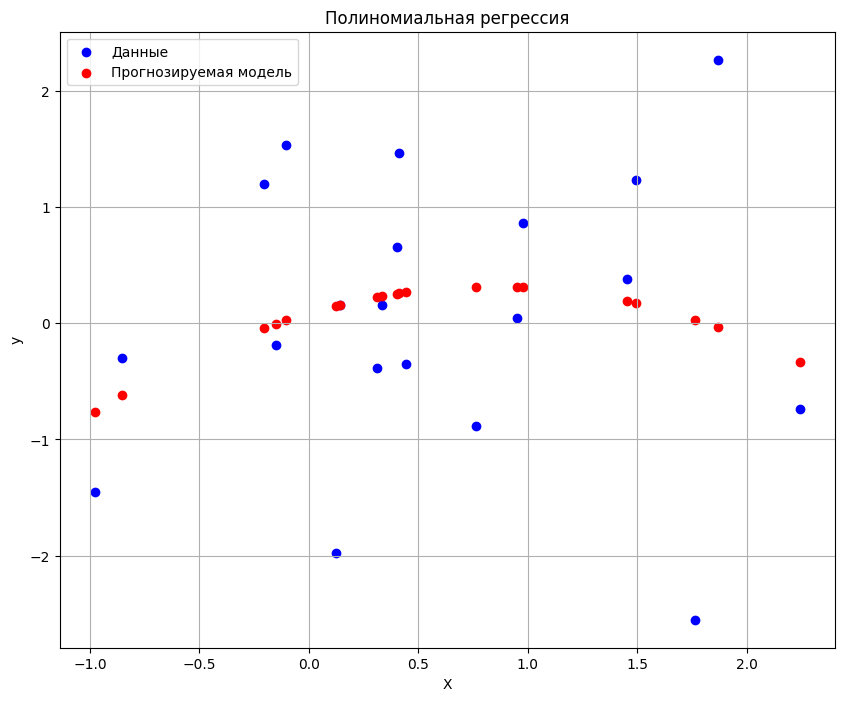

In [17]:
def plot_polynomial_regression(
    x, 
    y, 
    y_predict_poly, 
    func=plt.scatter, 
    title='Полиномиальная регрессия', 
    x_label='X', 
    y_label='y', 
    figsize=(10, 8)
    ):
    """
    Визуализирует результаты полиномиальной регрессии.

    Args:
        x (array-like): Независимая переменная.
        y (array-like): Зависимая переменная.
        model: Обученная модель полиномиальной регрессии.
        polynomial_features: Объект PolynomialFeatures, использованный для преобразования данных.
        title (str): Заголовок графика.
        x_label (str): Подпись оси X.
        y_label (str): Подпись оси Y.
        figsize (tuple): Размер фигуры (ширина, высота) в дюймах.
    """

    plt.figure(figsize=figsize)  # Увеличиваем размер графика
    plt.scatter(x, y, color='blue', label='Данные')  # Добавляем label
    func(x, y_predict_poly, color='red', label='Прогнозируемая модель')  # Используем plot вместо scatter и добавляем label
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()  # Добавляем легенду
    plt.grid(True)  # Добавляем сетку для лучшей читаемости
    plt.show()

y_predict_poly = model.predict(polynomial_features.fit_transform(x))

# Пример использования 
plot_polynomial_regression(x, y, y_predict_poly)

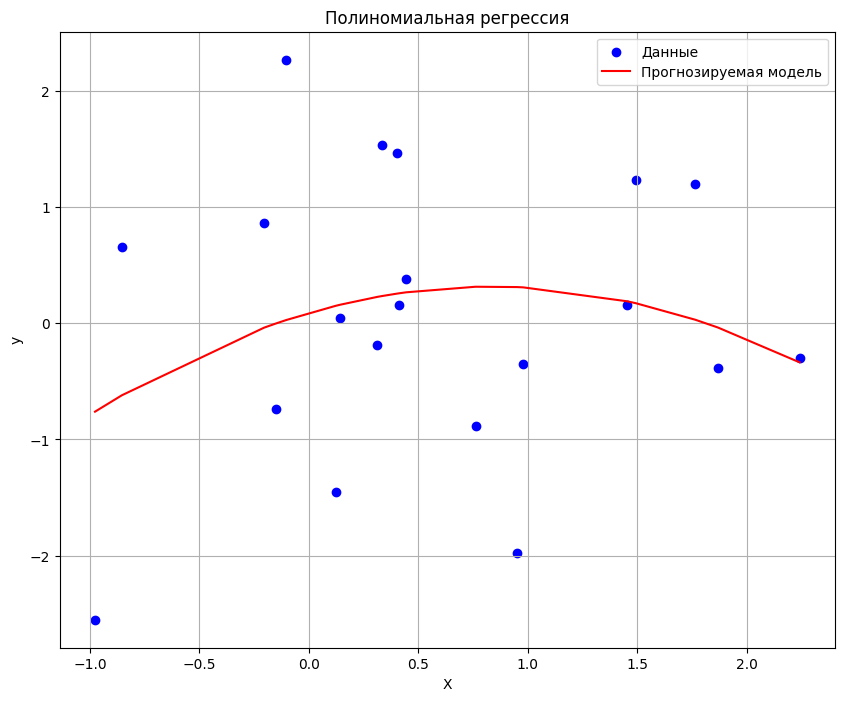

In [18]:
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
# Пример использования 
plot_polynomial_regression(x, y, y_poly_pred, func=plt.plot)